In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

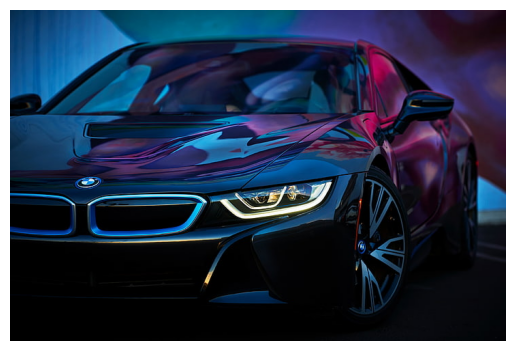

In [43]:
img = cv2.imread("C:\\Users\\barat\\Downloads\\car.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

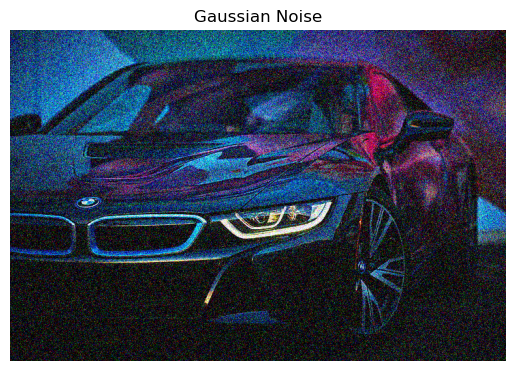

In [44]:
# Gaussian noise
mean = 0
stddev = 50
gaussian_noise = np.random.normal(mean, stddev, image.shape)

# Add noise to the image
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

plt.imshow(noisy_image, cmap='gray')  
plt.title("Gaussian Noise")
plt.axis('off')  
plt.show()

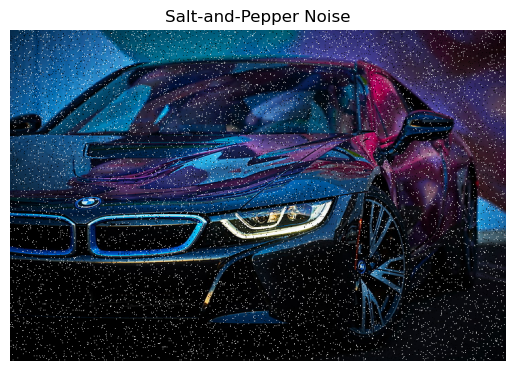

In [45]:
# Salt-and-Pepper Noise
salt_pepper_prob = 0.02  # Probability of noise
noisy_image = image.copy()

# Add salt noise (white pixels)
num_salt = int(salt_pepper_prob * image.size * 0.5)
coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
noisy_image[coords[0], coords[1]] = 255

# Add pepper noise (black pixels)
num_pepper = int(salt_pepper_prob * image.size * 0.5)
coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
noisy_image[coords[0], coords[1]] = 0

plt.imshow(noisy_image, cmap='gray')
plt.title("Salt-and-Pepper Noise")
plt.axis('off')
plt.show()

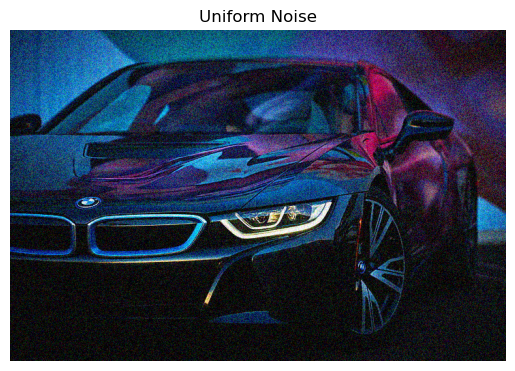

In [46]:
# Uniform Noise
min_val = -50
max_val = 50
uniform_noise = np.random.uniform(min_val, max_val, image.shape)

# Add noise to the image
noisy_image = image + uniform_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

plt.imshow(noisy_image, cmap='gray')
plt.title("Uniform Noise")
plt.axis('off')
plt.show()


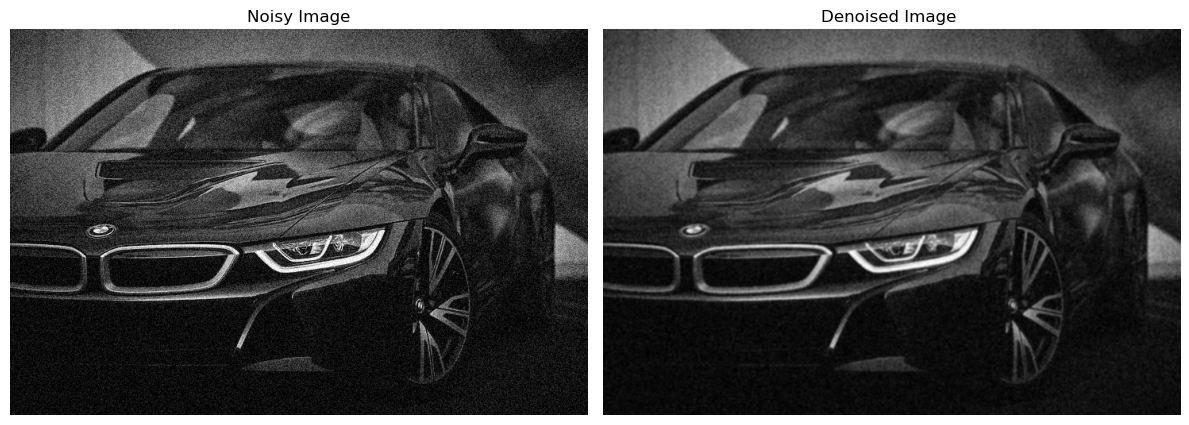

In [47]:
noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)
kernel_size = 5 
sigma = 1      

# Create the Gaussian kernel
k = kernel_size // 2
x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))
gaussian_kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
gaussian_kernel /= gaussian_kernel.sum() 

# Pad the noisy image to handle border pixels
padded_image = np.pad(noisy_image, k, mode='reflect')

# Initialize an empty array for the filtered image
filtered_image = np.zeros_like(noisy_image)

# Apply convolution manually
for i in range(noisy_image.shape[0]):
    for j in range(noisy_image.shape[1]):
        # Extract the region of interest from the padded image
        region = padded_image[i:i+kernel_size, j:j+kernel_size]
        # Perform element-wise multiplication with the Gaussian kernel and sum the result
        filtered_image[i, j] = np.sum(region * gaussian_kernel)

# Clip the resulting values to valid range (0–255)
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 6))
# Noisy Image
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
# Denoised Image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Denoised Image ")
plt.axis('off')
plt.tight_layout()
plt.show()

***Edge Detection Using Sobel Operator***

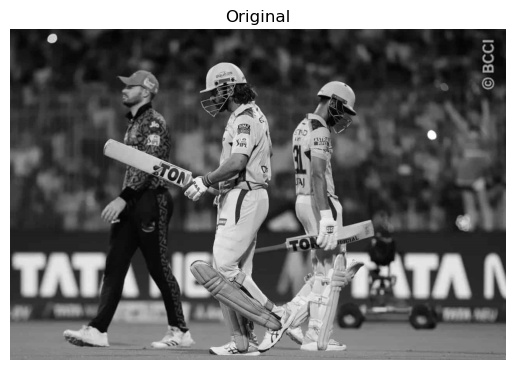

In [11]:
image2 = cv2.imread("C:\\Users\\student\\Downloads\\d.jpg", cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(image2,cmap='grey')
plt.title('Original')
plt.show()

In [12]:
# Sobel kernels
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])  # Horizontal edge detection

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])  # Vertical edge detection

In [13]:
# Pad the image to handle borders
padded_image = np.pad(image2, pad_width=1, mode='reflect')

# Initialize output images
gradient_x = np.zeros_like(image2, dtype=float)  # For horizontal edges
gradient_y = np.zeros_like(image2, dtype=float)  # For vertical edges
magnitude = np.zeros_like(image2, dtype=float)  # Edge magnitude

# Apply Sobel kernels
for i in range(image2.shape[0]):
    for j in range(image2.shape[1]):
        # Extract the 3x3 region
        region = padded_image[i:i+3, j:j+3]
        
        # Convolve with Sobel kernels
        gx = np.sum(region * sobel_x)
        gy = np.sum(region * sobel_y)
        
        # Store the gradients
        gradient_x[i, j] = gx
        gradient_y[i, j] = gy
        
        # Calculate the magnitude of the gradient
        magnitude[i, j] = np.sqrt(gx**2 + gy**2)

# Normalize the gradients for display
gradient_x = np.clip(gradient_x, 0, 255).astype(np.uint8)
gradient_y = np.clip(gradient_y, 0, 255).astype(np.uint8)
magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

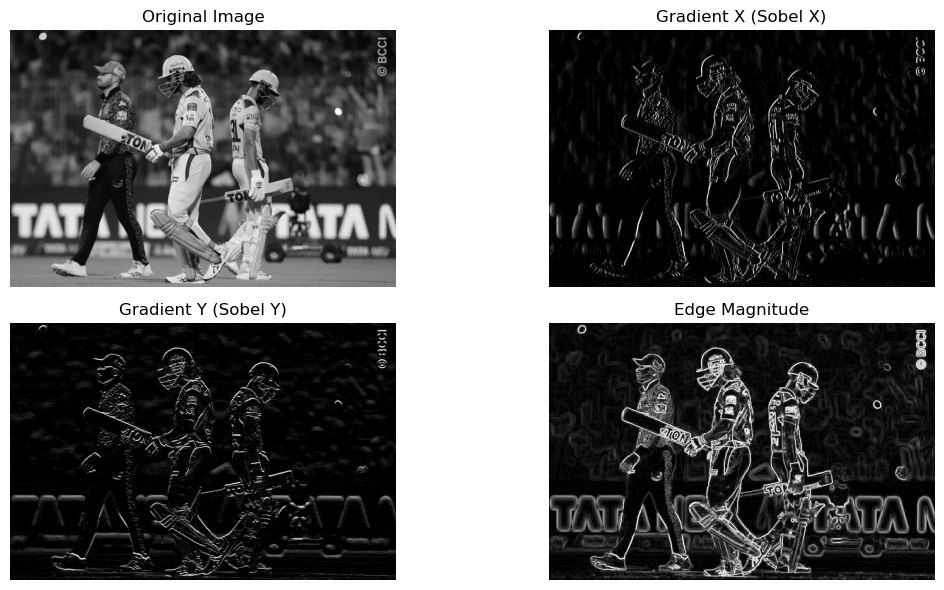

In [16]:
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(gradient_x, cmap='gray')
plt.title("Gradient X (Sobel X)")
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(gradient_y, cmap='gray')
plt.title("Gradient Y (Sobel Y)")
plt.axis('off')

# Gradient magnitude
plt.subplot(2, 2, 4)
plt.imshow(magnitude, cmap='gray')
plt.title("Edge Magnitude")
plt.axis('off')

plt.tight_layout()
plt.show()